In [1]:
import pandas as pd

# 1. Cargar la base
df = pd.read_csv(
    "C:/Users/usuario/Documents/Ciencia de Datos/TPFINAL/Base Aprender Estudiantes 6 Grado Primaria 2023 (3).csv",
    sep=";",       # si no funciona con "," probá con ";"
    encoding="latin1"  # si no funciona, probá "utf-8"
)

# 2. Dimensiones de la base
print("Dimensiones (filas, columnas):", df.shape)

# 3. Primeras filas (para mostrar ejemplos)
print(df.head())

# 4. Información general: tipos de variables y nulos
print("\nInformación de las columnas:")
print(df.info())

# 5. Resumen estadístico de las variables numéricas
print("\nResumen estadístico (solo numéricas):")
print(df.describe())

# 6. Ver algunas variables categóricas (ejemplo con 'provincia' o 'genero')
if 'provincia' in df.columns:
    print("\nDistribución por provincia:")
    print(df['provincia'].value_counts().head(10))

if 'genero' in df.columns:
    print("\nDistribución por género:")
    print(df['genero'].value_counts())


Dimensiones (filas, columnas): (642006, 206)
           ï»¿ID1  jurisdiccion  seccion  idalumno  sector  ambito ap01 ap02  \
0  20004002000400            50        1    247287       1       2    2    1   
1  20004002000400            50        2    247266       1       2    3    9   
2  20004002000400            50        1    247288       1       2    3    9   
3  20004002000400            50        1    247289       1       2    2    1   
4  20004002000400            50        1    247290       1       2    2   12   

  ap03 ap04  ...   mpuntaje  NSE_puntaje NSE_nivel edadA_junio2023 migracion  \
0    1    1  ...  466,75851  ,0057786424         2               2         2   
1    1    1  ...  455,46713   -,36903167         2               2         2   
2    1    1  ...  356,53931   -,50107211         2               2         2   
3    1    1  ...  449,15985    ,59687847         2               2         2   
4    1    1  ...  444,71057    ,92589754         2               2        

## Proceso de limpieza y tratamiento de missing values

In [2]:
import numpy as np
import pandas as pd

# Convertir todas las columnas a numérico si es posible
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Ahora reemplazar códigos negativos que representan NA
df_replaced = df_numeric.replace([-9, -8, -6], np.nan)

# Revisar
print(df_replaced.head())
print(df_replaced.isnull().sum())


# Contar valores faltantes por variable
print(df_replaced.isnull().sum())

# Porcentaje de faltantes por variable
missing_percent = df_replaced.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))


           ï»¿ID1  jurisdiccion  seccion  idalumno  sector  ambito  ap01  \
0  20004002000400            50        1    247287       1       2   2.0   
1  20004002000400            50        2    247266       1       2   3.0   
2  20004002000400            50        1    247288       1       2   3.0   
3  20004002000400            50        1    247289       1       2   2.0   
4  20004002000400            50        1    247290       1       2   2.0   

   ap02  ap03  ap04  ...  mpuntaje  NSE_puntaje  NSE_nivel  edadA_junio2023  \
0   1.0   1.0   1.0  ...       NaN          NaN          2              2.0   
1   9.0   1.0   1.0  ...       NaN          NaN          2              2.0   
2   9.0   1.0   1.0  ...       NaN          NaN          2              2.0   
3   1.0   1.0   1.0  ...       NaN          NaN          2              2.0   
4  12.0   1.0   1.0  ...       NaN          NaN          2              2.0   

   migracion  sobreedad  Nivel_Ed_Madre  Nivel_Ed_Padre  region  cli

In [3]:
import pandas as pd

# Lista de variables de interés
vars_interes = [
    "idalumno", "jurisdiccion", "sector", "ambito", "ap01", "ap06a", "ap06b", "ap06c", "ap06d", "ap06e",
    "ap07a", "ap07b",
    "ap10", 'ldesemp', 'mdesemp', 'Nivel_Ed_Madre','Nivel_Ed_Padre', "NSE_nivel"
]


# Construir tabla de resumen
tabla_nas = pd.DataFrame({
    "Cantidad_NA": df_replaced[vars_interes].isnull().sum(),
    "Porcentaje_NA": df_replaced[vars_interes].isnull().mean() * 100
})

# Ordenar por porcentaje de NA descendente
tabla_nas = tabla_nas.sort_values("Porcentaje_NA", ascending=False)

print(tabla_nas)


                Cantidad_NA  Porcentaje_NA
ap07b                138957      21.644190
ap06b                138558      21.582041
ap06e                134261      20.912733
ap06d                131596      20.497628
ap06a                 91555      14.260770
ap06c                 89169      13.889123
ap07a                 54575       8.500699
mdesemp               46344       7.218624
ldesemp               38413       5.983277
ap10                  28103       4.377373
ap01                  28103       4.377373
Nivel_Ed_Padre        21917       3.413831
Nivel_Ed_Madre        20490       3.191559
idalumno                  0       0.000000
jurisdiccion              0       0.000000
sector                    0       0.000000
ambito                    0       0.000000
NSE_nivel                 0       0.000000


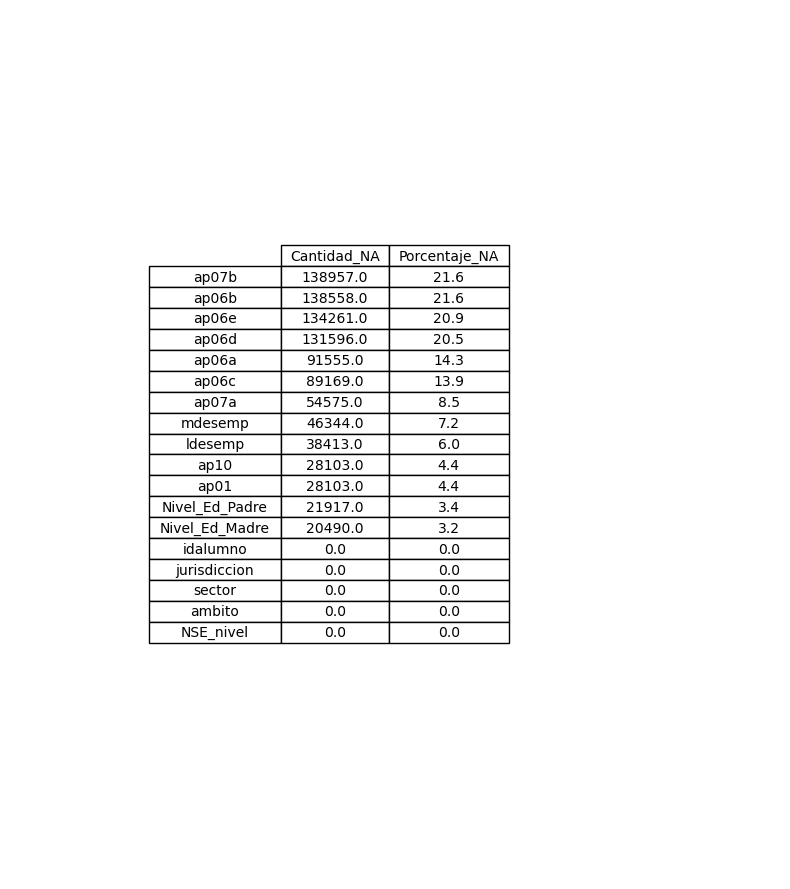

In [25]:
import matplotlib.pyplot as plt

# Redondear los valores a 1 decimal
tabla_nas_1dec = tabla_nas.round(1)

# Crear figura
fig, ax = plt.subplots(figsize=(8, len(tabla_nas_1dec)*0.5))
ax.axis('off')  # quitar ejes

# Dibujar la tabla
tbl = ax.table(cellText=tabla_nas_1dec.values,
               colLabels=tabla_nas_1dec.columns,
               rowLabels=tabla_nas_1dec.index,
               cellLoc='center',
               rowLoc='center',
               loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(tabla_nas_1dec.columns))))

# Guardar como imagen
plt.tight_layout()
plt.savefig("tabla_nas_1decimal.png", dpi=300)
plt.show()

In [4]:
#Eliminar filas con missing
df_clean = df.dropna(subset=['Nivel_Ed_Madre', 'Nivel_Ed_Padre'])
print(df_clean.shape)

(642006, 206)


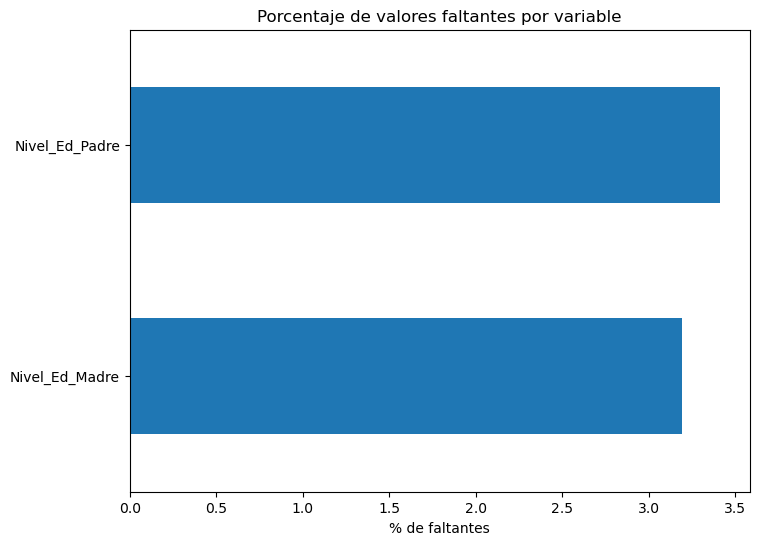

In [20]:
import matplotlib.pyplot as plt

missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values()

missing_percent.plot(kind='barh', figsize=(8,6))
plt.title("Porcentaje de valores faltantes por variable")
plt.xlabel("% de faltantes")
plt.show()

## HEATMAP

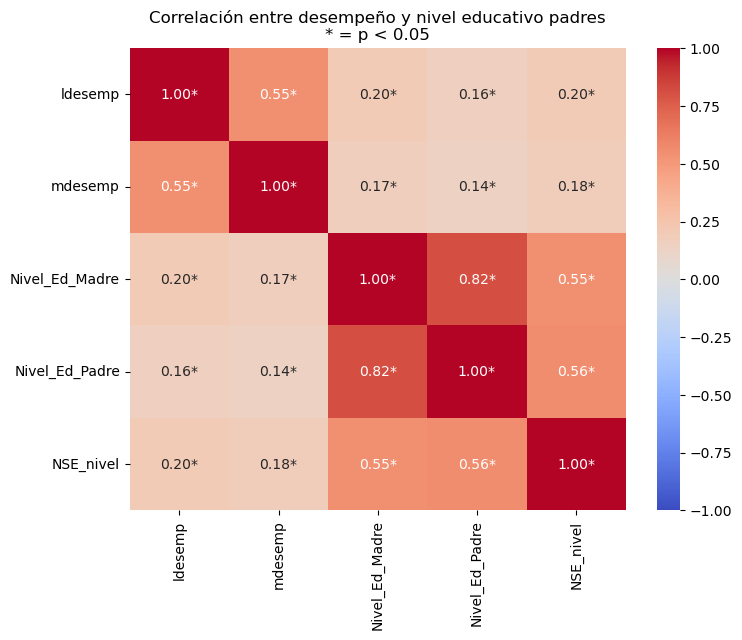

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

cols = ['ldesemp', 'mdesemp', 'Nivel_Ed_Madre', 'Nivel_Ed_Padre', "NSE_nivel"]
df_sub = df_clean[cols].apply(pd.to_numeric, errors='coerce')

n = len(cols)
corr_matrix = np.zeros((n, n))
pval_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        x = df_sub[cols[i]].dropna()
        y = df_sub[cols[j]].dropna()
        # Solo usar filas donde ambos no son NA
        valid = pd.concat([x, y], axis=1).dropna()
        if len(valid) > 1:
            r, p = pearsonr(valid.iloc[:,0], valid.iloc[:,1])
            corr_matrix[i,j] = r
            pval_matrix[i,j] = p
        else:
            corr_matrix[i,j] = np.nan
            pval_matrix[i,j] = np.nan

# Crear DataFrames a partir de las matrices
corr_df = pd.DataFrame(corr_matrix, index=cols, columns=cols)
pval_df = pd.DataFrame(pval_matrix, index=cols, columns=cols)

# Crear anotaciones con significancia
annot = corr_df.copy().astype(str)
for i in cols:
    for j in cols:
        if pd.notnull(corr_df.loc[i,j]):
            sig = "*" if pval_df.loc[i,j] < 0.05 else ""
            annot.loc[i,j] = f"{corr_df.loc[i,j]:.2f}{sig}"
        else:
            annot.loc[i,j] = ""

# Graficar heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=annot, fmt="", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación entre desempeño y nivel educativo padres\n* = p < 0.05")
plt.show()


## Veamos el tipo de respuesta de las demás variables

In [6]:
import pandas as pd

# Variables de interés
vars_tareas = ["ap01", "ap06a", "ap06b", "ap06c", "ap06d", "ap06e",
               "ap07a", "ap07b"]

# Diccionario para reemplazar códigos por texto (opcional)
codigos = {
    1: "No realicé esta tarea",
    2: "Algunos días",
    3: "De lunes a viernes",
    4: "Todos los días"
}

# Reemplazar códigos por texto (opcional, para la tabla)
df_respuestas = df_replaced[vars_tareas].replace(codigos)

# Crear tabla de frecuencias por variable
for var in vars_tareas:
    freq = df_respuestas[var].value_counts(dropna=False)  # incluir NAs si los hay
    perc = df_respuestas[var].value_counts(normalize=True, dropna=False) * 100
    resumen = pd.DataFrame({"Frecuencia": freq, "Porcentaje": perc.round(2)})
    print(f"\nVariable: {var}")
    print(resumen)



Variable: ap01
                       Frecuencia  Porcentaje
ap01                                         
Algunos días               421390       65.64
De lunes a viernes         172468       26.86
NaN                         28103        4.38
Todos los días              14678        2.29
5.0                          3513        0.55
No realicé esta tarea        1854        0.29

Variable: ap06a
                       Frecuencia  Porcentaje
ap06a                                        
No realicé esta tarea      257026       40.03
Algunos días               169083       26.34
Todos los días             106208       16.54
NaN                         91555       14.26
De lunes a viernes          18134        2.82

Variable: ap06b
                       Frecuencia  Porcentaje
ap06b                                        
No realicé esta tarea      404025       62.93
NaN                        138558       21.58
Algunos días                67225       10.47
Todos los días              20

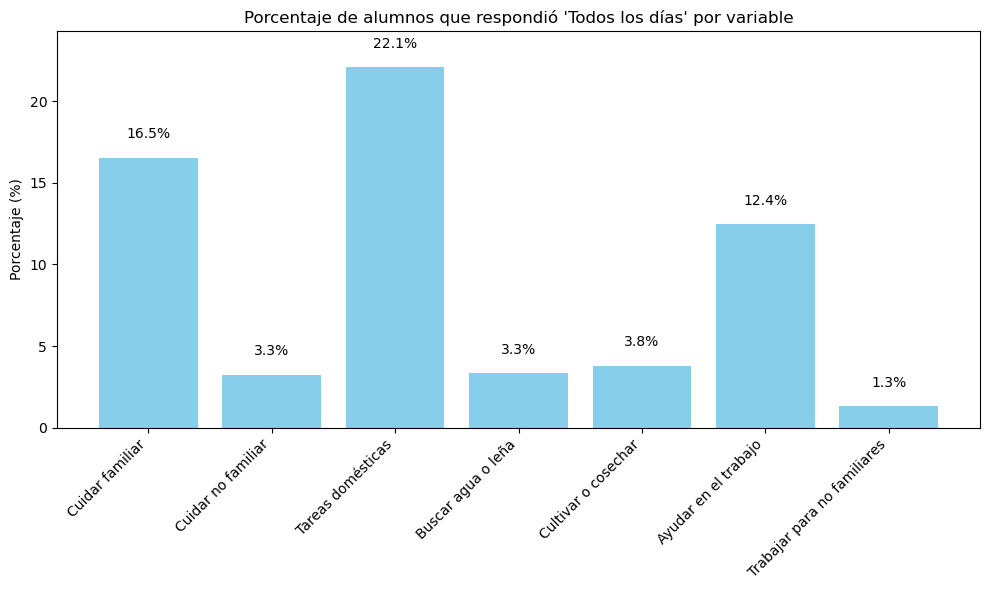

In [7]:
import matplotlib.pyplot as plt

# Variables de interés
vars_tareas = ["ap06a", "ap06b", "ap06c", "ap06d", "ap06e",
               "ap07a", "ap07b"]

# Diccionario para nombres más ilustrativos
nombres = {
    "ap06a": "Cuidar familiar",
    "ap06b": "Cuidar no familiar",
    "ap06c": "Tareas domésticas",
    "ap06d": "Buscar agua o leña",
    "ap06e": "Cultivar o cosechar",
    "ap07a": "Ayudar en el trabajo",
    "ap07b": "Trabajar para no familiares"
}

# Seleccionar solo la columna de interés
df_respuestas = df_replaced[vars_tareas]

# Calcular el porcentaje que respondió 4 ("Todos los días") en cada variable
porc_todos_dias = df_respuestas.apply(lambda x: (x == 4).mean() * 100)

# Renombrar las variables para el gráfico
porc_todos_dias.index = [nombres[i] for i in porc_todos_dias.index]

# Gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(porc_todos_dias.index, porc_todos_dias, color="skyblue")

# Limitar eje y un poco por encima del máximo
plt.ylim(0, max(porc_todos_dias)*1.1)

# Mostrar porcentaje encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.ylabel("Porcentaje (%)")
plt.title("Porcentaje de alumnos que respondió 'Todos los días' por variable")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


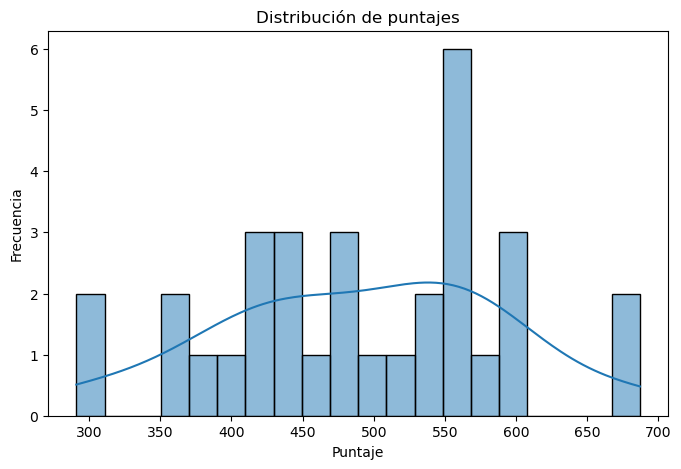

In [13]:
#mmm se ve raro...

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=df_replaced, x="mpuntaje", bins=20, kde=True)
plt.title("Distribución de puntajes")
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.show()


In [17]:
tabla["porcentaje"] = tabla.groupby("NSE_nivel")["n"].transform(lambda x: 100*x/x.sum())


In [18]:
import pandas as pd

tabla = pd.crosstab(df_replaced["NSE_nivel"], df_replaced["ldesemp"], normalize="index") * 100
print(tabla)

ldesemp          1.0        2.0        3.0        4.0
NSE_nivel                                            
1          19.151620  30.111272  34.364468  16.372639
2          11.731175  21.911337  38.697209  27.660279
3           5.468635  11.586628  33.335596  49.609141


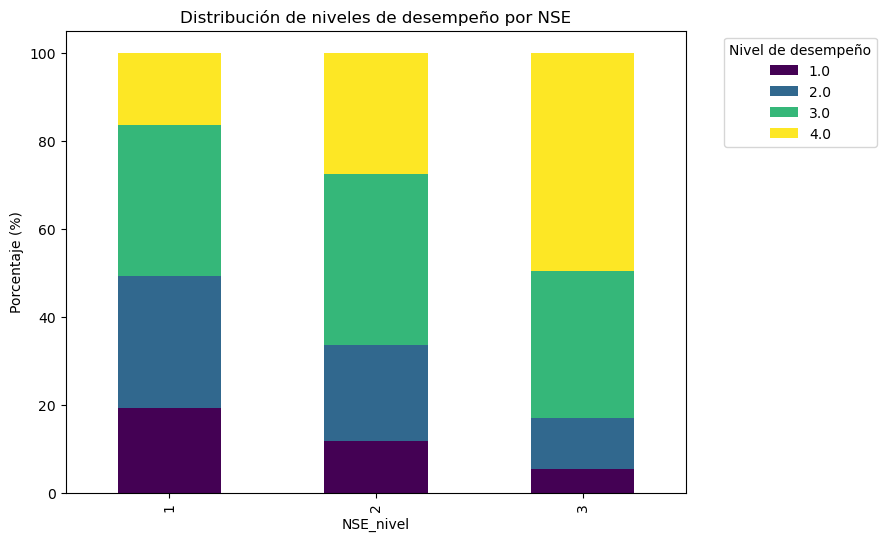

In [19]:
import matplotlib.pyplot as plt

# calculamos porcentajes con crosstab (más limpio)
tabla = pd.crosstab(df_replaced["NSE_nivel"], df_replaced["ldesemp"], normalize="index") * 100

# gráfico
tabla.plot(kind="bar", stacked=True, figsize=(8,6), colormap="viridis")

plt.ylabel("Porcentaje (%)")
plt.title("Distribución de niveles de desempeño por NSE")
plt.legend(title="Nivel de desempeño", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()